In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime

In [ ]:
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")
print("Path to dataset files:", path)

100%|██████████| 62.0k/62.0k [00:00<00:00, 21.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/imakash3011/customer-personality-analysis/versions/1


In [ ]:
df=pd.read_csv(path+'/marketing_campaign.csv',sep='\t')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
datos=df.copy()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
Inside_means= df['Income'].mean()
df['Income'].fillna(Inside_means, inplace=True)

<ipython-input-5-28be3943e8c6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(Inside_means, inplace=True)


In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df['Years']=2024-df['Year_Birth']
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Years
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,43


<ipython-input-8-7acfc741c415>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Income'],y=df.Response,orient='h', palette = "Set2")


Text(0.5, 1.0, 'Income-Response Boxplot')

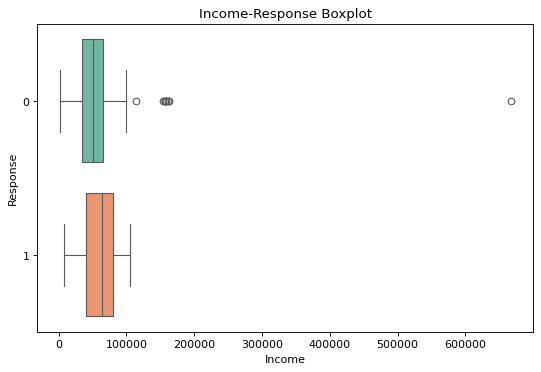

In [ ]:
plt.figure(figsize=(8, 5), dpi=80)
sns.boxplot(x=df['Income'],y=df.Response,orient='h', palette = "Set2")
plt.xlabel("Income")
plt.ylabel("Response")
plt.title('Income-Response Boxplot')


<ipython-input-9-51a45f6541c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Years'],y=df.Response,orient='h', palette = "Set2")


Text(0.5, 1.0, 'Income-Response Boxplot')

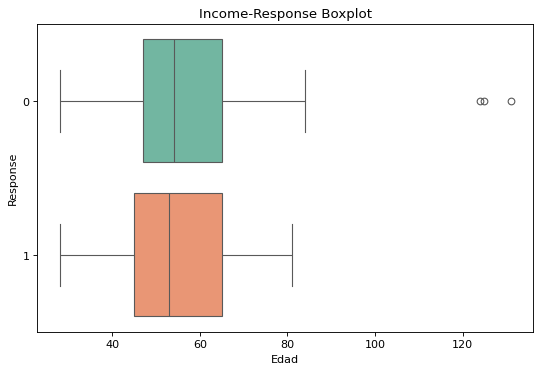

In [ ]:
plt.figure(figsize=(8, 5), dpi=80)
sns.boxplot(x=df['Years'],y=df.Response,orient='h', palette = "Set2")
plt.xlabel("Edad")
plt.ylabel("Response")
plt.title('Income-Response Boxplot')

<ipython-input-10-3796e30cd7d6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Income'],y=df['Education'],orient='h', palette = "Set2")


Text(0.5, 1.0, 'Income-Response Boxplot')

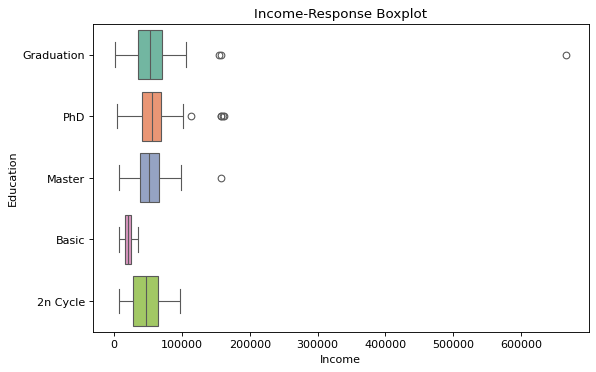

In [ ]:
plt.figure(figsize=(8, 5), dpi=80)
sns.boxplot(x=df['Income'],y=df['Education'],orient='h', palette = "Set2")
plt.xlabel("Income")
plt.ylabel("Education")
plt.title('Income-Response Boxplot')

In [ ]:
label_encoding = preprocessing.LabelEncoder()
df['Education'] = label_encoding.fit_transform(df['Education'])
df['Marital_Status'] = label_encoding.fit_transform(df['Marital_Status'])



In [ ]:
df.drop(['ID','Dt_Customer','Z_CostContact','Z_Revenue','Year_Birth'],axis=1,inplace=True)

In [ ]:
matrix_corr=df.corr()
matrix_corr.style.background_gradient(cmap='coolwarm')
#corr

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Years
Education,1.000000,0.007090,0.119974,-0.045564,0.118485,-0.011728,0.197576,-0.080412,0.033625,-0.112223,-0.105217,-0.095489,0.030075,0.081908,0.070782,0.070483,-0.040281,0.005836,0.053266,0.033346,-0.010845,0.021369,-0.050540,0.090819,0.171390
Marital_Status,0.007090,1.000000,0.021267,-0.022553,-0.003596,0.014159,0.008205,0.000593,0.030689,0.035808,0.017382,0.001688,-0.021772,-0.001894,0.015125,0.001412,-0.031210,-0.027113,0.014381,0.012817,-0.017097,0.018417,-0.005718,-0.011403,0.060580
Income,0.119974,0.021267,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,0.437497,0.436162,0.321978,-0.082290,0.380550,0.586725,0.526489,-0.549824,-0.016168,0.182791,0.334850,0.274921,0.087538,-0.027223,0.132756,0.160942
Kidhome,-0.045564,-0.022553,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,-0.080008,-0.230176
Teenhome,0.118485,-0.003596,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.154446,0.352111
Recency,-0.011728,0.014159,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.198437,0.019871
MntWines,0.197576,0.008205,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,0.247254,0.157773
MntFruits,-0.080412,0.000593,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,0.125289,0.017917
MntMeatProducts,0.033625,0.030689,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,0.236335,0.030872
MntFishProducts,-0.112223,0.035808,0.437497,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,0.111331,0.041625


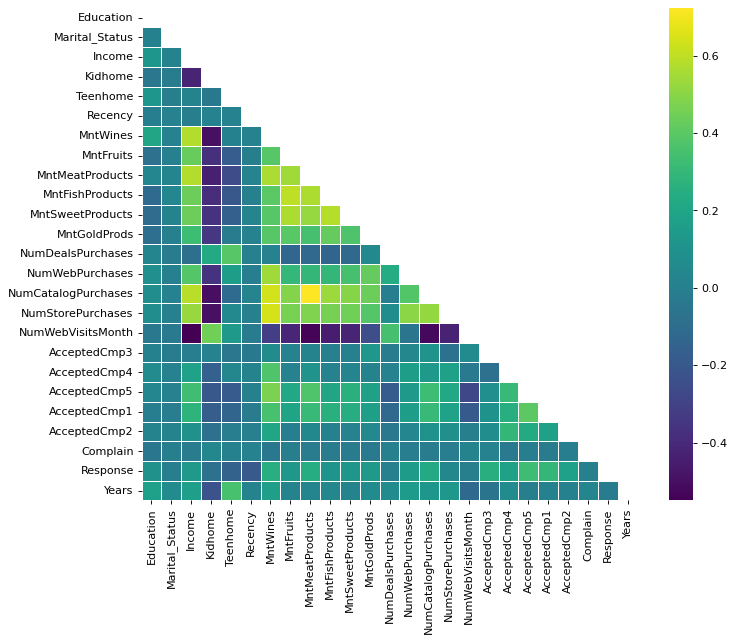

In [ ]:
plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
mask = np.triu(np.ones_like(matrix_corr, dtype=bool))

sns.heatmap(matrix_corr,mask=mask,annot=False, cmap='viridis', linewidths=0.5)
plt.show()

In [ ]:
model_kmeans=KMeans(n_clusters=len(df['Marital_Status'].unique()), max_iter=200)
model_kmeans.fit(df)

KMeans(max_iter=200)

In [ ]:
y_kmeans = model_kmeans.predict(df)
y_kmeans

array([2, 7, 1, ..., 2, 1, 2], dtype=int32)

In [ ]:
data=pd.DataFrame()
data['Cluster'] = y_kmeans
data['Marital_Status']= df['Marital_Status']
data.head()

,Cluster,Marital_Status
0,2,4
1,7,4
2,1,5
3,0,5
4,2,3


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(data['Marital_Status'], data['Cluster'])

print(confusion_mat)

[[  0   1   0   0   1   0   0   0]
 [  2   0   1   0   0   0   0   0]
 [ 35  56  45   0  33  20   1  42]
 [140 179 173   0 124  93   3 152]
 [ 83  84  88   0  77  61   0  87]
 [ 98 121 107   1  83  56   3 111]
 [ 11  19  19   0  12   1   0  15]
 [  0   0   2   0   0   0   0   0]]


In [ ]:
datos['Dt_Customer'].head(5)

,Dt_Customer
0,04-09-2012
1,08-03-2014
2,21-08-2013
3,10-02-2014
4,19-01-2014


In [ ]:
for i in range(datos.index.size):
  # Store the original date string in a temporary variable
  date_string = str(datos['Dt_Customer'][i])
  # Convert the date string to datetime object
  date_object = datetime.strptime(date_string, '%d-%m-%Y')
  # Extract the year and assign it back to the DataFrame
  datos.loc[i, 'Dt_Customer'] = date_object.year
  datos.loc[i, 'Mont_Customer'] = int(date_object.month)


In [ ]:
datos[['Dt_Customer','Mont_Customer']].head(5)

,Dt_Customer,Mont_Customer
0,2012,9.0
1,2014,3.0
2,2013,8.0
3,2014,2.0
4,2014,1.0
